<ipython-input-251-85fa1cb242f0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_stats_final['Year'] = nba_stats_final['Year'].astype(int)


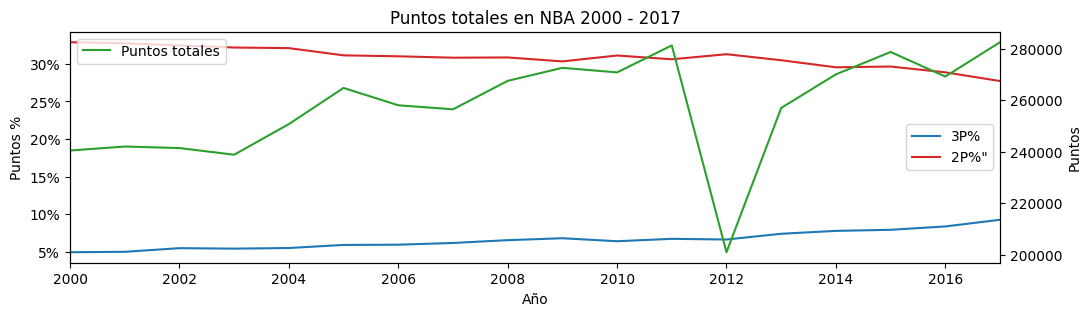

In [251]:
# Mediante este script se intenta responder a la hipotésis generada por las siguientes preguntas:
 #  ¿Hubo un crecimiento de la cantidad de puntos totales en NBA desde el año 2000 en temporada regular?
 #  ¿Cuál fue el impacto de las anotaciones de 3 puntos?
 #  ¿Influyeron la cantidad de partidos jugados?

from pickle import TRUE
from google.colab import drive
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

df = pd.read_csv('/content/Seasons_Stats.csv')
columns = ['Year', 'G', 'FG', 'FGA', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'PTS']
nba_stats_nob =  df[columns]
nba_stats = nba_stats_nob.fillna(0)
nba_stats_21 = nba_stats.round(0).astype(int)
nba_stats_final = nba_stats[nba_stats_21['Year'] > 1999]
#nba_stats_final.head()
nba_stats_final['Year'] = nba_stats_final['Year'].astype(int)

#nba_stats_final
nba_stats_final.index = nba_stats_final['Year']
nba_stats_final = nba_stats_final.drop('Year', axis='columns')
y = nba_stats_final.groupby('Year').agg({'G':'max',
                             '3P': 'sum',
                             '2P': 'sum',
                              'FT': 'sum',
                              'PTS': 'sum'})
x = y.index

percentage_3P = (y['3P'] / y['PTS']) * 100
percentage_2P = (y['2P'] / y['PTS']) * 100

fig, ax1 = plt.subplots(figsize=(12, 3))
ax1.plot(x, percentage_3P, label='3P%')
ax1.plot(x, percentage_2P, label='2P%"', color='C3')

ax1.set_xlabel('Año')
ax1.set_ylabel('Puntos %')
ax1.set_title('Puntos totales en NBA 2000 - 2017')
ax1.set_xlim(x.min(), x.max())
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

ax2 = ax1.twinx()
ax2.plot(x, y['PTS'], label='Puntos totales', color='C2')
ax2.set_ylabel('Puntos', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend()
ax1.legend()
